In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/IFA/production/'
output_data_path = '../data/extracted/'

In [3]:
all_data = pd.DataFrame()

for file in os.listdir(data_path):
    open_file = pd.ExcelFile(data_path+file)
    sheets = [name for name in open_file.sheet_names if ' P' in name]

    for sheet in sheets:

        data = pd.read_excel(data_path+file, sheet_name=sheet, skiprows=6)[:11][['Unnamed: 0']+list(range(2009, 2021))].rename(columns={'Unnamed: 0': 'Region'}).set_index(['Region'])

        # Remove total string
        data.index = data.index.str.replace('Total ', '')

        # Calculate Europe
        data.loc['Europe'] = data.loc[['West Europe', 'Central Europe']].sum()

        # Rename columns
        data.drop(['West Europe', 'EU 28', 'Central Europe'], inplace=True)
        data.rename(index={'East Europe & Central Asia': 'Former USSR', 'E. Europe & C. Asia': 'Former USSR', 'West Asia': 'Middle East', 'East Asia': 'North East Asia'}, inplace=True)
        data['PRODUCT'] = sheet.split(' P')[0]

        all_data = pd.concat((all_data, data.reset_index()))


In [4]:
fao = pd.read_csv(data_path+'extra_inputs\FAOSTAT_data_en_4-28-2023.csv')[['Year','Element', 'Value']]
fao_filt = fao[fao['Element']=='Agricultural Use in nutrients'].set_index('Year')
ifa = all_data.groupby('PRODUCT').sum().sum()

fao_forecast = (fao_filt.loc[2020:]['Value']*(ifa[2020]/(fao_filt['Value'][2020]/1E6)))/1E6
fao_backcast = (fao_filt.loc[:2009]['Value']*(ifa[2009]/(fao_filt['Value'][2009]/1E6)))/1E6
year_addition = ((fao_forecast[2050]-fao_forecast[2020])/30)/fao_forecast[2020]

In [6]:
data_backcast = all_data[['Region', 2009, 'PRODUCT']]
for y in range(1978, 2009):
    data_backcast[y] = data_backcast[2009]*(fao_backcast[y]/fao_backcast[2009])

data_forecast = all_data[['Region', 2020, 'PRODUCT']]
for i, y in enumerate(range(2021, 2051)):
    data_forecast[y] = data_forecast[2020]+(year_addition*(i+1)*data_forecast[2020])

C:\Users\lukec\AppData\Local\Temp/ipykernel_7604/3120787847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_backcast[y] = data_backcast[2009]*(fao_backcast[y]/fao_backcast[2009])
C:\Users\lukec\AppData\Local\Temp/ipykernel_7604/3120787847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_forecast[y] = data_forecast[2020]+(year_addition*(i+1)*data_forecast[2020])


In [8]:
all_data

,Region,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,PRODUCT
0,Former USSR,19462.9,20999.6,23366.8,23071.7,22655.7,21746.0,22335.2,22518.0,22781.0,23190.3,25665.6,27092.9,NH3
1,North America,13871.2,14687.1,15457.8,15162.9,15717.7,15795.4,16611.4,17408.4,18603.3,20447.3,21181.9,21943.1,NH3
2,Latin America,9482.8,9924.1,9929.6,9548.6,9057.8,8857.8,8612.6,9015.1,8839.2,7664.6,7103.8,6453.0,NH3
3,Africa,5806.5,6331.2,5850.4,5691.8,5267.0,5335.1,5406.0,7411.3,8318.5,10047.4,9532.4,9419.0,NH3
4,Middle East,11055.6,12699.3,14193.1,14601.4,15145.3,15314.9,15686.8,16625.3,17611.5,18320.1,17242.2,17671.0,NH3
5,South Asia,16839.6,17137.8,17103.8,16635.4,17203.7,17176.6,18238.0,18846.2,18484.5,18946.6,19606.8,20057.3,NH3
6,North East Asia,59624.1,57445.1,58749.0,62950.4,70800.8,68712.2,71339.7,65032.9,61802.5,62219.9,64200.7,64607.7,NH3
7,Oceania,1799.4,1916.8,1507.6,1780.8,1876.2,1802.2,2084.5,2053.3,2150.8,1805.4,1965.0,2054.7,NH3
8,Europe,14489.2,16268.9,16821.0,17141.6,16906.7,16793.8,16587.5,16407.0,16918.5,16272.9,15801.6,16094.5,NH3
0,Former USSR,14378.1,14606.0,16130.0,16244.6,16044.8,15878.6,15950.5,16705.1,16620.1,16804.5,17785.9,18835.5,AN


In [7]:
data_forecast

,Region,2020,PRODUCT,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Former USSR,27092.9,NH3,27273.240249,27453.580498,27633.920747,27814.260996,27994.601245,28174.941494,28355.281743,...,30880.045228,31060.385477,31240.725726,31421.065975,31601.406224,31781.746473,31962.086722,32142.426971,32322.767220,32503.107469
1,North America,21943.1,NH3,22089.161297,22235.222594,22381.283891,22527.345189,22673.406486,22819.467783,22965.529080,...,25010.387240,25156.448537,25302.509834,25448.571131,25594.632428,25740.693726,25886.755023,26032.816320,26178.877617,26324.938914
2,Latin America,6453.0,NH3,6495.953528,6538.907055,6581.860583,6624.814110,6667.767638,6710.721165,6753.674693,...,7355.024079,7397.977606,7440.931134,7483.884661,7526.838189,7569.791716,7612.745244,7655.698771,7698.652299,7741.605827
3,Africa,9419.0,NH3,9481.696308,9544.392616,9607.088924,9669.785232,9732.481540,9795.177848,9857.874157,...,10735.622470,10798.318778,10861.015086,10923.711394,10986.407702,11049.104010,11111.800318,11174.496626,11237.192934,11299.889242
4,Middle East,17671.0,NH3,17788.624637,17906.249275,18023.873912,18141.498550,18259.123187,18376.747825,18494.372462,...,20141.117386,20258.742024,20376.366661,20493.991298,20611.615936,20729.240573,20846.865211,20964.489848,21082.114486,21199.739123
5,South Asia,20057.3,NH3,20190.808723,20324.317446,20457.826168,20591.334891,20724.843614,20858.352337,20991.861060,...,22860.983179,22994.491901,23128.000624,23261.509347,23395.018070,23528.526793,23662.035515,23795.544238,23929.052961,24062.561684
6,North East Asia,64607.7,NH3,65037.752475,65467.804950,65897.857425,66327.909901,66757.962376,67188.014851,67618.067326,...,73638.801978,74068.854453,74498.906928,74928.959403,75359.011878,75789.064353,76219.116829,76649.169304,77079.221779,77509.274254
7,Oceania,2054.7,NH3,2068.376835,2082.053669,2095.730504,2109.407338,2123.084173,2136.761007,2150.437842,...,2341.913525,2355.590359,2369.267194,2382.944028,2396.620863,2410.297697,2423.974532,2437.651366,2451.328201,2465.005035
8,Europe,16094.5,NH3,16201.630877,16308.761754,16415.892631,16523.023508,16630.154385,16737.285262,16844.416139,...,18344.248417,18451.379294,18558.510171,18665.641048,18772.771925,18879.902802,18987.033679,19094.164556,19201.295433,19308.426310
0,Former USSR,18835.5,AN,18960.875975,19086.251950,19211.627926,19337.003901,19462.379876,19587.755851,19713.131827,...,21468.395480,21593.771455,21719.147430,21844.523406,21969.899381,22095.275356,22220.651331,22346.027307,22471.403282,22596.779257


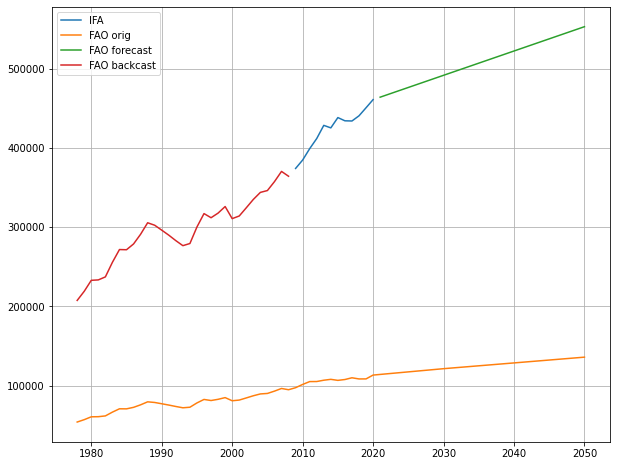

In [9]:
fig, ax = plt.subplots(1,1,figsize=[10,8], facecolor='white')
ax.plot(ifa.index, ifa.values, label='IFA')
ax.plot(fao_filt.index, (fao_filt['Value'])/1E6, label='FAO orig')
ax.plot(data_forecast.sum().index[3:], data_forecast.sum().values[3:], label='FAO forecast')
ax.plot(data_backcast.sum().index[3:],data_backcast.sum().values[3:], label='FAO backcast')
ax.legend()
ax.grid()

In [10]:
combined_data = data_backcast.drop(columns=[2009]).merge(all_data, on=['Region', 'PRODUCT']).merge(data_forecast.drop(columns=[2020]), on=['Region', 'PRODUCT'])

In [11]:
## Add uncertainties
production_uncertainty = 0.1


years = list(range(1978, 2051))

for col in years:
    if col<2009 or col>2020:
        combined_data[str(col)+'_sigma'] = combined_data[col]*production_uncertainty*2
    else: combined_data[str(col)+'_sigma'] = combined_data[col]*production_uncertainty

combined_data.to_csv(output_data_path+'IFA_production_w_uncertainties.csv', index=False)